In [42]:
import numpy as np
import pandas
from numpy import sin, cos, exp
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.interpolate # use for scipy.interpolate.CubicHermiteSpline
from scipy.integrate import solve_ivp


In [4]:
midpoint = lambda a,b : a + (b-a)/2

errorBound = lambda a,b : (b-a)/2

oppositeSign = lambda fa,fb :  np.sign(fa)*np.sign(fb) < 0

def bisection( f, interval, tol=1e-9, maxIters = 100):
  """Assuming f is continuous and changes sign on the interval,
  this returns an approximation of a root

  bisection( f, interval, tol=[...], maxIters=[...])
    interval = (a,b)  should be a tupple
  """
  a,b = interval  # unpack it
  fa,fb = f(a),f(b)
  if not oppositeSign(fa,fb):
    raise ValueError('Interval function does not change sign, may not contain root')
  if errorBound( fa, fb) < tol:
    return
  
  p   = midpoint(a,b)
  fp  = f(p)
  history = [p]
  fcn_history = [fp]
  iters = 0

  while errorBound( fa, fb) > tol and iters <= maxIters :
    iters += 1

    if oppositeSign( fa, fp ):
      b,fb = p,fp
    else:
      a,fa = p,fp

    p   = midpoint(a,b)
    fp  = f(p)
    history.append(p)
    fcn_history.append(fp)
  return p, history, fcn_history

In [8]:
seq1 = (5,5,5,5,5,5,5,5,5)
coeff = np.poly(seq1)
poly = np.poly1d(coeff)
p, history, f_history = bisection(poly, (4.82,5.2), tol = 1e-4 )

for i,(p,fp) in enumerate( zip(history,f_history) ):
  print( "Iter {:2d}, p={:.16f}, |f(p)| = {:.2e}.".format(i,p,abs(fp)))

TypeError: 'NoneType' object is not iterable

In [2]:
p = lambda x: (-1/6)*(x-1)*(x-2)*(x-3) + (x-0)*(x-2)*(x-3) - (3/2)*(x-0)*(x-1)*(x-3) - (2/3)*(x-0)*(x-1)*(x-2)
p((1/2))

1.0

In [5]:
t = lambda x: -(x**2)/math.factorial(2) + (x**4)/math.factorial(4) - (x**6)/math.factorial(6) + (x**8)/math.factorial(8) - (x**10)/math.factorial(10)

In [6]:
t(2e-8)

In [7]:
math.cos(2e-8)-1

In [8]:
def bisection( f, interval, tol=1e-9, totalIters = 100):
    a,b = interval 
    fa,fb = f(a),f(b)
    oppositeSign = lambda fa,fb :  np.sign(fa)*np.sign(fb) < 0
    errorBound = lambda a,b : (b-a)/2
    midpoint = lambda a,b : a + (b-a)/2
    if not oppositeSign(fa,fb):
        raise ValueError('Function does not change sign on the interval. May not contain root on Interval')
  

    p   = midpoint(a,b)
    fp  = f(p)
    history = [p]
    f_history = [fp]
    iteration = 0

    while errorBound( fa, fb) > tol and iteration <= totalIters :
        iteration += 1

        if oppositeSign( fa, fp ):
              b,fb = p,fp
        else:
              a,fa = p,fp

        p   = midpoint(a,b)
        fp  = f(p)
        history.append(p)
        f_history.append(fp)
    return p, history, f_history

In [12]:
f = lambda x : x**2 - 2
p, history, f_history = bisection(f, (1,2), tol = 2**(-20) )
for i,(p,fp) in enumerate( zip(history,f_history) ):
    print( "Iter {:2d}, p={:.16f}, |f(p)| = {:.2e}".format(i,p,abs(fp)))

Iter  0, p=1.5000000000000000, |f(p)| = 2.50e-01
Iter  1, p=1.2500000000000000, |f(p)| = 4.38e-01
Iter  2, p=1.3750000000000000, |f(p)| = 1.09e-01
Iter  3, p=1.4375000000000000, |f(p)| = 6.64e-02
Iter  4, p=1.4062500000000000, |f(p)| = 2.25e-02
Iter  5, p=1.4218750000000000, |f(p)| = 2.17e-02
Iter  6, p=1.4140625000000000, |f(p)| = 4.27e-04
Iter  7, p=1.4179687500000000, |f(p)| = 1.06e-02
Iter  8, p=1.4160156250000000, |f(p)| = 5.10e-03
Iter  9, p=1.4150390625000000, |f(p)| = 2.34e-03
Iter 10, p=1.4145507812500000, |f(p)| = 9.54e-04
Iter 11, p=1.4143066406250000, |f(p)| = 2.63e-04
Iter 12, p=1.4141845703125000, |f(p)| = 8.20e-05
Iter 13, p=1.4142456054687500, |f(p)| = 9.06e-05
Iter 14, p=1.4142150878906250, |f(p)| = 4.31e-06
Iter 15, p=1.4141998291015625, |f(p)| = 3.88e-05
Iter 16, p=1.4142074584960938, |f(p)| = 1.73e-05
Iter 17, p=1.4142112731933594, |f(p)| = 6.47e-06
Iter 18, p=1.4142131805419922, |f(p)| = 1.08e-06
Iter 19, p=1.4142141342163086, |f(p)| = 1.62e-06
Iter 20, p=1.4142136

In [83]:
N_2_hd2 =  3.141593478636688
N_2_h = 3.141602881806524

N_3_h = N_2_hd2+ ((N_2_hd2 - N_2_h)/((2**(1))-1))
N_3_h

In [17]:
# write it as "forward_Euler" instead of camelCase "forwardEuler"
#   following suggestions of PEP8 style guide, https://pep8.org/
def forward_Euler( f, y0, tspan, h=0.1, dense_output=False):
  """ Solve IVP y' = f(t,y) on a <= t <= b, y(a)=y0, via improved Euler with stepsize h
  This code has NOT been tested to work with systems.
  Returns tHist, wHist where wHist[i] approximates y( tHist[i] )
  """
  if len(tspan) is not 2:
    raise ValueError("tspan must be array of length 2")
  a, b = tspan[0], tspan[1]  
  # Initialize
  t    = a
  w    = y0
  # Update history
  tHist = [t]
  wHist = [w]  # w[i] approximates y( t[i] )
  dydtHist = []
  # Loop
  while t < b :
    tNext = min(t+h,b)  # don't go too far
    hh    = tNext - t   # hh is just h except perhaps at the last time step
    dydt  = f(t,w)
    w    += hh*dydt     # this is the heart of forward Euler
    t     = tNext
    # Update history
    tHist.append(t)
    wHist.append(w)
    dydtHist.append(dydt)

  dydtHist.append( f(t,w) )# lagged

  if dense_output is True:
    sol = scipy.interpolate.CubicHermiteSpline(tHist,wHist,dydtHist)
    return np.array(tHist), np.array(wHist), sol
  else:  
    return np.array(tHist), np.array(wHist)

In [35]:
k = 5
f  = lambda t,y: 10*y**2+0*f
y0 = .1
tspan = [0.0,1.0]

tHist, wHist = forward_Euler( f, y0, tspan, h=.25,dense_output=False)

len(tHist), len(wHist)

t_points  = np.linspace(tspan[0],tspan[1],200)

#plt.plot(tHist, wHist)

data = {'t': tHist, 'y(t)': wHist}
df = pandas.DataFrame(data=data)

TypeError: unsupported operand type(s) for *: 'int' and 'function'

In [33]:
df

,t,y(t)
0,0.0,0.200000
1,0.2,1.000000
2,0.4,0.980067
3,0.6,0.921061
4,0.8,0.825336
5,1.0,0.696707
6,1.2,0.540302
7,1.4,0.362358
8,1.6,0.169967
9,1.8,-0.029200


In [36]:
n = [8, 
16, 
32, 
64, 
128, 
256, 
512, 
1024, 
2048, 
4096] 

In [78]:
c1 = [3.141853320742374, 
3.141634186673505, 
3.141598567141290, 
3.141593444476827, 
3.141592755917011, 
3.141592666605240, 
3.141592655231017, 
3.141592653795842, 
3.141592653615609, 
3.141592653593017]
error1 = []
for i in range(len(c1)):
    error1.append(abs(3.141592653589790-c1[i]))

Text(0,0.5,'log(error)')

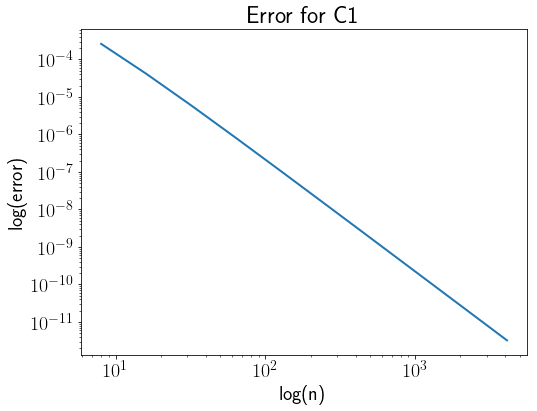

In [79]:
plt.loglog(n, error1)
plt.title('Error for C1')
plt.xlabel('log(n)')
plt.ylabel('log(error)')

In [71]:
c2 = [3.141602881806524, 
3.141593478636688, 
3.141592712667618, 
3.141592657551323, 
3.141592653846416, 
3.141592653606128, 
3.141592653590817, 
3.141592653589862, 
3.141592653589790]

error2 = []
for i in range(len(c2)):
    error2.append(abs(3.141592653589790-c2[i]))

Text(0,0.5,'log(error)')

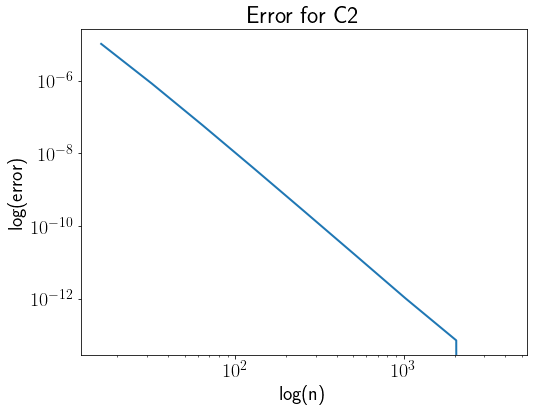

In [77]:
plt.loglog(n[1:], error2)
plt.title('Error for C2')
plt.xlabel('log(n)')
plt.ylabel('log(error)')

In [49]:
n[0]